In [1]:
!pip install sympy matplotlib

     ---------------------------------------- 6.5/6.5 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 532.6/532.6 kB 1.7 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.5/2.5 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00


In [20]:
import sympy
from sympy.plotting import plot

## f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

1. Определить корни {−7.6506222, −5.026865, −1.3389, 2.2731, 4.38353, 8.0351642}
2. Найти интервалы, на которых функция возрастает (−6.83137, −4.167783); (1.700608, 3.8193109); (7.0010317, +oo)
3. Найти интервалы, на которых функция убывает (-oo, −6.83137); (−4.167783, 1.700608); (3.8193109, 7.0010317)
4. Построить график +
5. Вычислить вершину (3.8193109, 872.255770)
6. Определить промежутки, на котором f > 0 (+oo, −7.6506222); (−5.026865, −1.3389); (2.2731, 4.38353); (8.0351642, +oo)
7. Определить промежутки, на котором f < 0 (−7.6506222, −5.026865); (−1.3389, 2.2731); (4.38353, 8.0351642)



In [103]:
x = sympy.symbols('x')
fx = -12 * x ** 4 * sympy.sin(sympy.cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
fx

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

In [104]:
fx_diff = fx.diff()
fx_diff

12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10

Строим график

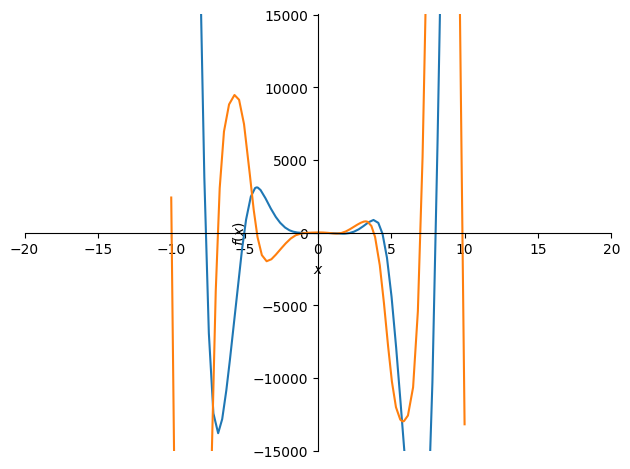

In [157]:
plot(fx, fx_diff, xlim=(-20,20), ylim=(-15050, 15050))

Находим корни

In [151]:
def find_root_in_range(fx, begin, end, accuracy=0.1):
    while True:
        begin *= 10
        end *= 10
        coef = 10 ** (math.ceil(sympy.log(abs(begin), 10).evalf())-1)
        priv_root = begin
        root = begin/coef
        priv = fx.subs(x, root).evalf()
        for root in range(int(begin+1), int(end)):
            current = fx.subs(x, root/coef).evalf()
            dif = abs(priv + current)
            if (dif < abs(current)):
                if dif < accuracy:
                    return root/coef.evalf()            
                begin = priv_root
                end = root
                break
            priv = current
            priv_root = root     

        

In [108]:
find_root_in_range(fx, -8, -7.5, 0.01)

-7.65062220000000

In [109]:
find_root_in_range(fx, -5.2, -4.8, 0.01)

-5.02686500000000

In [110]:
find_root_in_range(fx, -2, -1, 0.01)

-1.33890000000000

In [114]:
find_root_in_range(fx, 2, 2.5, 0.01)

2.27310000000000

In [113]:
find_root_in_range(fx, 4, 5, 0.01)

4.38353000000000

In [115]:
find_root_in_range(fx, 7.5, 8.5, 0.01)

8.03516420000000

Находим интервалы убывания/возрастания

In [123]:
find_root_in_range(fx_diff, -8, -6, 0.01)

-6.83137000000000

In [124]:
find_root_in_range(fx_diff, -5, -2.5, 0.01)

-4.16778300000000

In [153]:
find_root_in_range(fx_diff, 1.5, 2, 0.01)

1.70060800000000

In [154]:
find_root_in_range(fx_diff, 3, 4, 0.01)

3.81931090000000

In [156]:
find_root_in_range(fx_diff, 6.5, 7.5, 0.01)

7.00103170000000

Поиск вершины

In [158]:
fx.subs(x, 3.8193109)

872.255770291054